In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
df = pd.read_excel("C:\\data science class\\assignments\\Association Rules_compl\\Online retail.xlsx")

df_new = pd.read_excel("C:\\data science class\\assignments\\Association Rules_compl\\Online retail.xlsx", header=None)
df_new.columns= ['product']
df_new

,product
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


In [3]:
pip install apyori

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Data Preprocessing
'''  because of apriori doesn't accept the any other input format rather than list so we need to convert file data into list '''
print(df_new.shape)

# Now split each string into a list
trans=df_new.values.tolist()
split_data = [item[0].split(",") for item in trans]
print(split_data)

(7501, 1)
[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['eggs', 'pet food'], ['cookies'], ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'], ['spaghetti', 'champagne', 'cookies'], ['mineral water', 'salmon'], ['mineral water'], ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'], ['turkey', 'eggs'], ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken'

In [27]:
from apyori import apriori
rules = apriori(transactions = split_data, 
                min_support = 0.0045, 
                min_confidence = 0.2, 
                min_lift = 1, 
                min_length = 2,
                max_length = 2)

results = list(rules)
#print(results)
print(len(results))
results[0]

221


RelationRecord(items=frozenset({'mineral water'}), support=0.23836821757099053, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'mineral water'}), confidence=0.23836821757099053, lift=1.0)])

In [28]:
a=[]
b=[]
c=[]
d=[]
e=[]

for i in range(0,221):
    a.append(results[i][2][0][0])  # base item
    b.append(results[i][2][0][1])  # add item
    c.append(results[i][1])  # support
    d.append(results[i][2][0][2])  # confidence
    e.append(results[i][2][0][3])  # lift

a= pd.DataFrame(a)
b= pd.DataFrame(b)
c= pd.DataFrame(c)
d= pd.DataFrame(d)
e= pd.DataFrame(e)

df_list =  pd.concat([a,b,c,d,e],axis=1)
df_list.columns = ["base",'add','support','confidence','lift']
df_list

,base,add,support,confidence,lift
0,None,mineral water,0.238368,0.238368,1.000000
1,almonds,burgers,0.005199,0.254902,2.923577
2,almonds,chocolate,0.005999,0.294118,1.795099
3,almonds,eggs,0.006532,0.320261,1.782108
4,almonds,green tea,0.005066,0.248366,1.879913
...,...,...,...,...,...
216,turkey,spaghetti,0.016531,0.264392,1.518535
217,vegetables mix,spaghetti,0.005599,0.217617,1.249879
218,white wine,spaghetti,0.004533,0.274194,1.574828
219,whole wheat pasta,spaghetti,0.008799,0.298643,1.715251


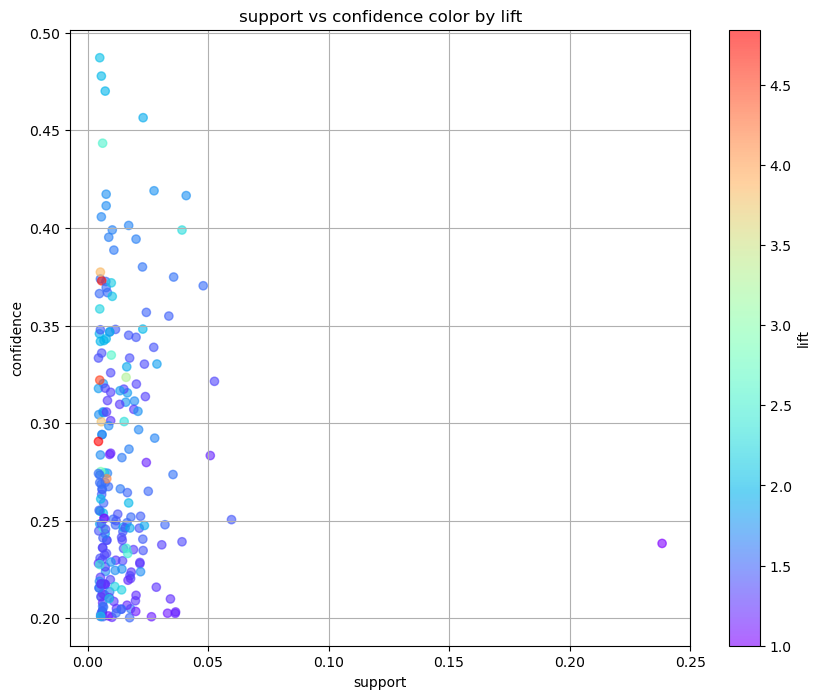

In [34]:
plt.figure(figsize=(10,8))
plt.scatter(df_list['support'], df_list['confidence'], alpha=0.6, c=df_list['lift'], cmap = 'rainbow')
plt.colorbar(label='lift')
plt.xlabel("support")
plt.ylabel("confidence")
plt.title("support vs confidence color by lift")
plt.grid(True)
plt.show()

In [ ]:
1. What is lift and why is it important in Association rule?
-Lift is a metric used in association rule mining, specially in market basket analysis (e.g., "people who buy X product also buy Y product")
- Higher lift values indicate a strong association that is worth acting on promotions, product placement in shop
-Lift helps identify whether the rule is significant or just coincidental.

2. What is support and Confidence. How do you calculate them?
Support=
-Support is the proportion of transactions in the dataset occurence of product together in transactions and total transactions
- support = occurence of product together / total transactions
- It hells us to find how frequent the itemset is in the dataset

confidence=
-Confidence measures the probability of both products
-confidence =  probability product / support product

3. What are some limitations or challenges of Association rules mining?
-genrate too many rule with low support and confidence
-Makes it hard to find truly useful insights
-AlgoritPerformance drops sharply with large datasets
-Algorithms like Apriori are computationally expensive.
-Performance drops sharply with large datasets
-Association rules show correlation, not causation.
-Important but infrequent patterns may be missed if support threshold is high
